In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

%matplotlib inline

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified


In [12]:
def plot_img (img):
    img = (img/2 + 0.5).numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    
data_iter = iter(trainloader)
images, labels = data_iter.next()

In [9]:
images.shape

torch.Size([4, 3, 32, 32])

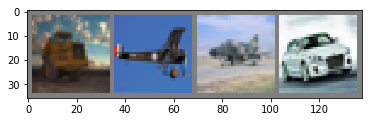

In [13]:
plot_img(torchvision.utils.make_grid(images))

In [14]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

truck plane plane   car


In [15]:
class Net (nn.Module):
    
    def __init__ (self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward (self, x):
        
        # Conv 1
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        
        # Conv2
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # Flatten
        x = x.view(-1, 16*5*5)
        
        # Fc1
        x = F.relu(self.fc1(x))
        
        # Fc2
        x = F.relu(self.fc2(x))
        
        # Fc3
        x = self.fc3(x)
        
        return x
        

In [16]:
net = Net()